# Plot of shot types over all teams in a season

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from ift6758.data.data_acquisition import Season
import matplotlib as plt
import seaborn as sns
import pandas as pd
import numpy as np
import json 

#### I chose 2019 because I didn't dl it yet and it is noted as the best season of the decade from this [link](https://champsorchumps.us/records/best-nhl-regular-season-records)

In [3]:
pd.__version__

'1.3.3'

In [4]:
from  ift6758.data.data_acquisition import Season
season2019 = Season(2019,"../ift6758/data")
df = season2019.clean_data()
df.head()

100%|██████████████████████████████████████████████████████████████████████████████| 1299/1299 [01:57<00:00, 11.02it/s]


Len of games_list in 2019 is 1550


d:\udem mila\ift 6758\project\ift6758-project-main\ift6758\data\data_acquisition.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fil_event['shooter'],df_fil_event['goalie'] = zip(*df_fil_event["players"].map(important_players)) ## Choosing Goalie and shooter


,result.event,gamePk,team.name,about.period,about.periodTime,about.periodType,about.periodTimeRemaining,coordinates.x,coordinates.y,result.secondaryType,result.emptyNet,result.strength.name,shooter,goalie
0,Shot,2019010001,Vegas Golden Knights,1,00:52,REGULAR,19:08,-34.0,19.0,Wrist Shot,NaN,NaN,Reilly Smith,Adin Hill
1,Shot,2019010001,Arizona Coyotes,1,01:12,REGULAR,18:48,67.0,-15.0,Snap Shot,NaN,NaN,Robbie Russo,Malcolm Subban
2,Shot,2019010001,Vegas Golden Knights,1,01:46,REGULAR,18:14,-36.0,32.0,Snap Shot,NaN,NaN,Zach Whitecloud,Adin Hill
3,Goal,2019010001,Arizona Coyotes,1,04:00,REGULAR,16:00,42.0,-19.0,Snap Shot,False,Even,Ilya Lyubushkin,Malcolm Subban
4,Goal,2019010001,Vegas Golden Knights,1,04:39,REGULAR,15:21,-71.0,-3.0,Wrist Shot,False,Even,Max Pacioretty,Adin Hill


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83057 entries, 0 to 83056
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   result.event               83057 non-null  object 
 1   gamePk                     83057 non-null  object 
 2   team.name                  83057 non-null  object 
 3   about.period               83057 non-null  int64  
 4   about.periodTime           83057 non-null  object 
 5   about.periodType           83057 non-null  object 
 6   about.periodTimeRemaining  83057 non-null  object 
 7   coordinates.x              82987 non-null  float64
 8   coordinates.y              82987 non-null  float64
 9   result.secondaryType       82978 non-null  object 
 10  result.emptyNet            7815 non-null   object 
 11  result.strength.name       8037 non-null   object 
 12  shooter                    83057 non-null  object 
 13  goalie                     82659 non-null  obj

In [20]:
df.head()
df['count'] = df['result.event']
df_g = df[['result.event','result.secondaryType','count']]
df_g= df_g.groupby(['result.secondaryType','result.event'], as_index=False ).count()
df_g


,result.secondaryType,result.event,count
0,Backhand,Goal,789
1,Backhand,Shot,5848
2,Deflected,Goal,242
3,Deflected,Shot,1369
4,Slap Shot,Goal,815
5,Slap Shot,Shot,11206
6,Snap Shot,Goal,1181
7,Snap Shot,Shot,10059
8,Tip-In,Goal,741
9,Tip-In,Shot,3662


In [9]:
'''
team = pd.unique(df_teams['team.name'])
team = pd.DataFrame(team, columns=['team.name'])

#print(team)
shot = np.unique(df_teams['result.secondaryType'])
shot
#create shot with teams for plotting
goal_backhand = df_teams.loc[(df_teams['result.secondaryType'] == 'Backhand') & (df_teams['result.event'] == 'Goal') ,['team.name','count']]
goal_b = pd.merge(team, goal_backhand, how='left', on=['team.name']).fillna(0)


goal_deflected = df_teams.loc[(df_teams['result.secondaryType'] == 'Deflected') & (df_teams['result.event'] == 'Goal') ,['team.name','count']]
goal_d = pd.merge(team, goal_deflected, how='left', on=['team.name']).fillna(0)
    
    
goal_slap_shot = df_teams.loc[(df_teams['result.secondaryType'] == 'Slap Shot') & (df_teams['result.event'] == 'Goal') ,['team.name','count']]
goal_ss = pd.merge(team, goal_slap_shot, how='left', on=['team.name']).fillna(0)

goal_snap_shot = df_teams.loc[(df_teams['result.secondaryType'] == 'Snap Shot') & (df_teams['result.event'] == 'Goal') ,['team.name','count']]
goal_snap = pd.merge(team, shot_snap_shot, how='left', on=['team.name']).fillna(0)

goal_tip_in = df_teams.loc[(df_teams['result.secondaryType'] == 'Tip-In') & (df_teams['result.event'] == 'Goal') ,['team.name','count']]
goal_t = pd.merge(team, goal_tip_in, how='left', on=['team.name']).fillna(0)

goal_wrap_arround = df_teams.loc[(df_teams['result.secondaryType'] == 'Wrap-around') & (df_teams['result.event'] == 'Goal') ,['team.name','count']]
goal_wrap = pd.merge(team, goal_wrap_arround, how='left', on=['team.name']).fillna(0)

goal_wrist_shot = df_teams.loc[(df_teams['result.secondaryType'] == 'Wrist Shot') & (df_teams['result.event'] == 'Goal') ,['team.name','count']]
goal_wrist = pd.merge(team, goal_wrist_shot, how='left', on=['team.name']).fillna(0)

goal_wrist
'''

"\nteam = pd.unique(df_teams['team.name'])\nteam = pd.DataFrame(team, columns=['team.name'])\n\n#print(team)\nshot = np.unique(df_teams['result.secondaryType'])\nshot\n#create shot with teams for plotting\ngoal_backhand = df_teams.loc[(df_teams['result.secondaryType'] == 'Backhand') & (df_teams['result.event'] == 'Goal') ,['team.name','count']]\ngoal_b = pd.merge(team, goal_backhand, how='left', on=['team.name']).fillna(0)\n\n\ngoal_deflected = df_teams.loc[(df_teams['result.secondaryType'] == 'Deflected') & (df_teams['result.event'] == 'Goal') ,['team.name','count']]\ngoal_d = pd.merge(team, goal_deflected, how='left', on=['team.name']).fillna(0)\n    \n    \ngoal_slap_shot = df_teams.loc[(df_teams['result.secondaryType'] == 'Slap Shot') & (df_teams['result.event'] == 'Goal') ,['team.name','count']]\ngoal_ss = pd.merge(team, goal_slap_shot, how='left', on=['team.name']).fillna(0)\n\ngoal_snap_shot = df_teams.loc[(df_teams['result.secondaryType'] == 'Snap Shot') & (df_teams['result.eve

In [10]:
team = pd.unique(df_teams['team.name'])
team = pd.DataFrame(team, columns=['team.name'])

#print(team)
shot_type = np.unique(df_teams['result.secondaryType'])
shot_type
#create shot with teams for plotting
shot_backhand = df_teams.loc[(df_teams['result.secondaryType'] == 'Backhand') & (df_teams['result.event'] == 'Shot') ,['team.name','count']]
shot_b = pd.merge(team, shot_backhand, how='left', on=['team.name']).fillna(0)


shot_deflected = df_teams.loc[(df_teams['result.secondaryType'] == 'Deflected') & (df_teams['result.event'] == 'Shot') ,['team.name','count']]
shot_d = pd.merge(team, shot_deflected, how='left', on=['team.name']).fillna(0)
    
    
shot_slap_shot = df_teams.loc[(df_teams['result.secondaryType'] == 'Slap Shot') & (df_teams['result.event'] == 'Shot') ,['team.name','count']]
shot_ss = pd.merge(team, shot_slap_shot, how='left', on=['team.name']).fillna(0)

shot_snap_shot = df_teams.loc[(df_teams['result.secondaryType'] == 'Snap Shot') & (df_teams['result.event'] == 'Shot') ,['team.name','count']]
shot_snap = pd.merge(team, shot_snap_shot, how='left', on=['team.name']).fillna(0)

shot_tip_in = df_teams.loc[(df_teams['result.secondaryType'] == 'Tip-In') & (df_teams['result.event'] == 'Shot') ,['team.name','count']]
shot_t = pd.merge(team, shot_tip_in, how='left', on=['team.name']).fillna(0)

shot_wrap_arround = df_teams.loc[(df_teams['result.secondaryType'] == 'Wrap-around') & (df_teams['result.event'] == 'Shot') ,['team.name','count']]
shot_wrap = pd.merge(team, shot_wrap_arround, how='left', on=['team.name']).fillna(0)

shot_wrist_shot = df_teams.loc[(df_teams['result.secondaryType'] == 'Wrist Shot') & (df_teams['result.event'] == 'Shot') ,['team.name','count']]
shot_wrist = pd.merge(team, shot_wrist_shot, how='left', on=['team.name']).fillna(0)

shot_b

,team.name,count
0,Anaheim Ducks,164.0
1,Arizona Coyotes,189.0
2,Boston Bruins,183.0
3,Buffalo Sabres,161.0
4,Calgary Flames,182.0
5,Carolina Hurricanes,182.0
6,Chicago Blackhawks,210.0
7,Colorado Avalanche,222.0
8,Columbus Blue Jackets,211.0
9,Dallas Stars,228.0


In [21]:
shot = df_g.loc[(df_g['result.event'] == 'Shot'),['result.secondaryType','count']]
#shot
goal = df_g.loc[(df_g['result.event'] == 'Goal'),['result.secondaryType','count']]
#goal
df_plot=pd.merge(shot, goal, how='left', on=['result.secondaryType']).fillna(0)
df_plot = df_plot.rename(columns={"count_x":"shot_count","count_y":"goal_count"}) 
df_plot

,result.secondaryType,shot_count,goal_count
0,Backhand,5848,789
1,Deflected,1369,242
2,Slap Shot,11206,815
3,Snap Shot,10059,1181
4,Tip-In,3662,741
5,Wrap-around,708,54
6,Wrist Shot,42163,4141


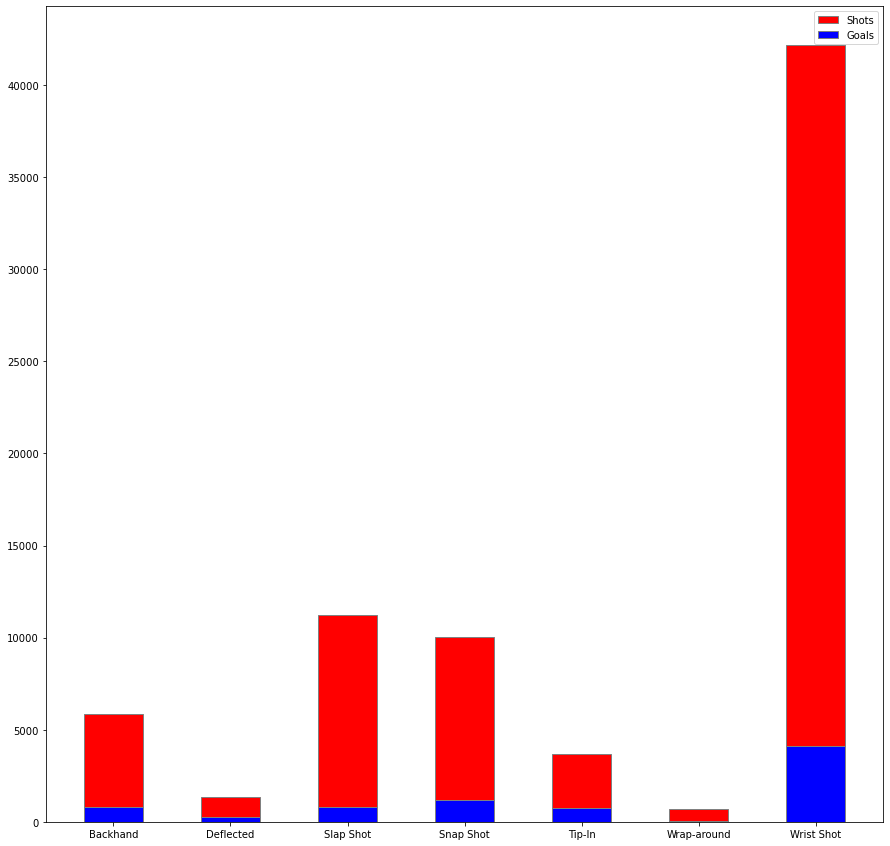

In [52]:
# set width of bar
barWidth = 0.5
fig = plt.subplots(figsize =(15, 15))

shots = np.array(df_plot.shot_count)  #IT, CSE, ECE will be replaced by Hockey Teams
goals = np.array(df_plot.goal_count)
#CSE = [29, 3, 24, 25, 17]

#the values we take are the folloing ones
br1 = np.array(df_plot['result.secondaryType'])
plt.bar(br1, shots, color ='r', width = barWidth,
        edgecolor ='grey', label='Shots')
plt.bar(br1, goals, color ='b', width =barWidth,
        edgecolor ='grey', label='Goals')
plt.legend()

<AxesSubplot:title={'center':'shot/goal count for all teams in 2019-2020 season'}, xlabel='result.secondaryType'>

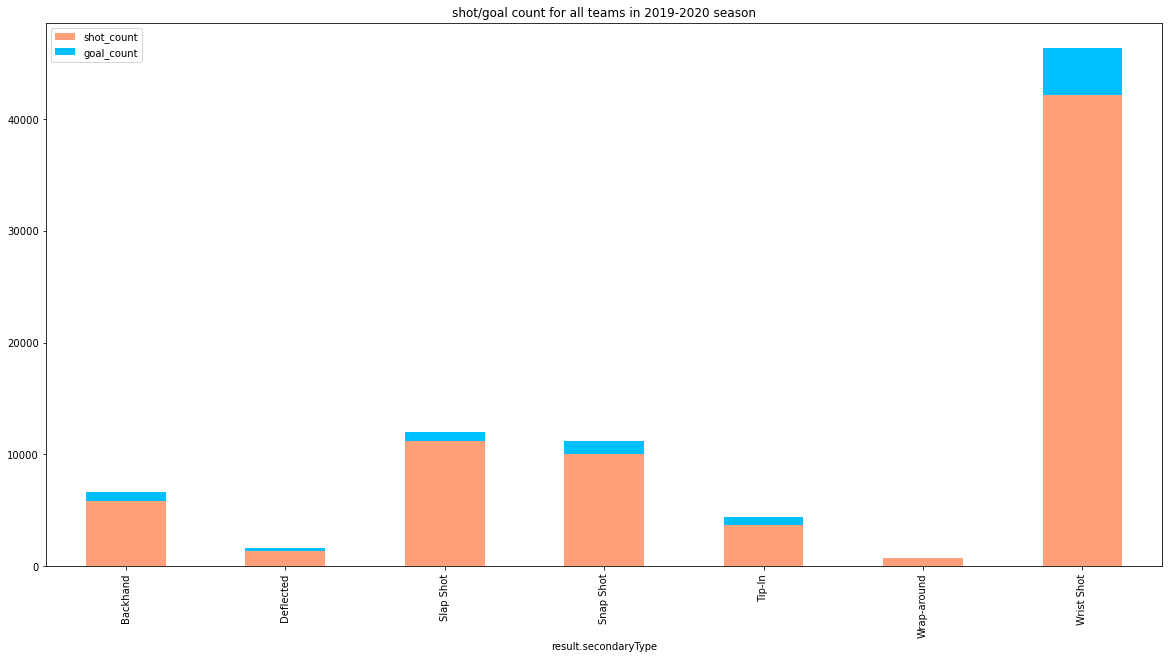

In [22]:
df_plot.plot.bar(x='result.secondaryType',stacked=True,color={"shot_count":"lightsalmon", "goal_count":"deepskyblue"}, figsize=(20,10), title="shot/goal count for all teams in 2019-2020 season")

<AxesSubplot:title={'center':'Wrist shot/goal count per teams in 2019-2020 season'}, xlabel='team.name'>

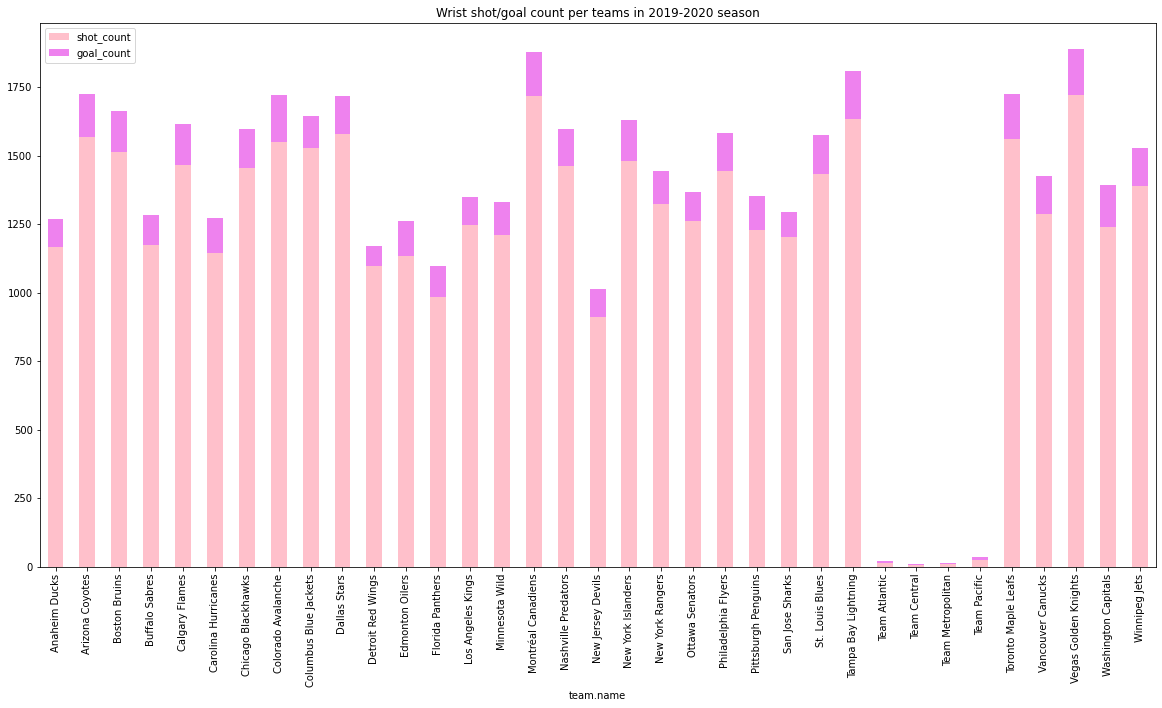

In [247]:
import numpy as np
import matplotlib.pyplot as plt
 
# set width of bar
#the values we take are the folloing ones
#plot for backhand sht and goal
shot_wrist = shot_wrist.rename(columns={"count":"shot_count"}) 
goal_wrist = goal_wrist.rename(columns={"count":"goal_count"}) 

wrist_shot = pd.merge(shot_wrist,goal_wrist, how="inner", on="team.name")
wrist_shot.plot.bar(x='team.name',stacked=True,color={"shot_count":"pink", "goal_count":"violet"}, figsize=(20,10), title="Wrist shot/goal count per teams in 2019-2020 season")

In [238]:
shot

array(['Backhand', 'Deflected', 'Slap Shot', 'Snap Shot', 'Tip-In',
       'Wrap-around', 'Wrist Shot'], dtype=object)

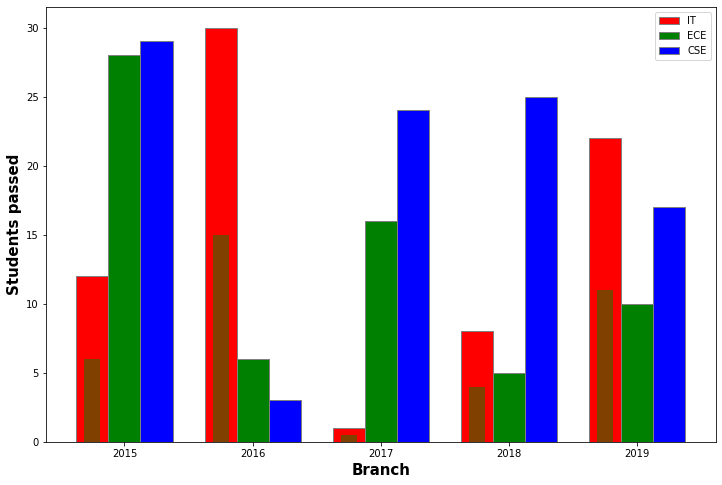

In [174]:
import numpy as np
import matplotlib.pyplot as plt
 
# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))
 
# set height of bar
IT = [12, 30, 1, 8, 22]  #IT, CSE, ECE will be replaced by Hockey Teams
ECE = [28, 6, 16, 5, 10]
CSE = [29, 3, 24, 25, 17]
 
# Set position of bar on X axis
br1 = np.arange(len(IT))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
 
# Make the plot
plt.bar(br1, IT, color ='r', width = barWidth,
        edgecolor ='grey', label ='IT') #First plot is for shots
plt.bar(br1, [i*0.5 for i in IT], color='green', width= 0.5*barWidth, alpha=0.5) #Second plot is for goals further we repeat this pattern for all teams.
plt.bar(br2, ECE, color ='g', width = barWidth,
        edgecolor ='grey', label ='ECE')
plt.bar(br3, CSE, color ='b', width = barWidth,
        edgecolor ='grey', label ='CSE')
 
# Adding Xticks
plt.xlabel('Branch', fontweight ='bold', fontsize = 15)
plt.ylabel('Students passed', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(IT))],
        ['2015', '2016', '2017', '2018', '2019']) #years would get replaced by different Shot Types Wrist shot, Slapshot, Snap shot, Backhanders, tip in
 
plt.legend()
plt.show()

In [1]:
# Try to take the coordindates at create a new "distance" column

In [2]:
from  ift6758.data.data_acquisition import Season
season2019 = Season(2019,"../ift6758/data")
df = season2019.clean_data()
df.head()

File already Exists, loading from ../ift6758/data/PICKLE//2019_clean.pkl


,result.event,gamePk,team.name,about.period,about.periodTime,about.periodType,about.periodTimeRemaining,coordinates.x,coordinates.y,result.secondaryType,result.emptyNet,result.strength.name,shooter,goalie
0,Shot,2019010001,Vegas Golden Knights,1,00:52,REGULAR,19:08,-34.0,19.0,Wrist Shot,NaN,NaN,Reilly Smith,Adin Hill
1,Shot,2019010001,Arizona Coyotes,1,01:12,REGULAR,18:48,67.0,-15.0,Snap Shot,NaN,NaN,Robbie Russo,Malcolm Subban
2,Shot,2019010001,Vegas Golden Knights,1,01:46,REGULAR,18:14,-36.0,32.0,Snap Shot,NaN,NaN,Zach Whitecloud,Adin Hill
3,Goal,2019010001,Arizona Coyotes,1,04:00,REGULAR,16:00,42.0,-19.0,Snap Shot,False,Even,Ilya Lyubushkin,Malcolm Subban
4,Goal,2019010001,Vegas Golden Knights,1,04:39,REGULAR,15:21,-71.0,-3.0,Wrist Shot,False,Even,Max Pacioretty,Adin Hill


In [50]:
df_dist = df[['result.event','coordinates.x','coordinates.y']]
df_dist

,result.event,coordinates.x,coordinates.y
0,Shot,-34.0,19.0
1,Shot,67.0,-15.0
2,Shot,-36.0,32.0
3,Goal,42.0,-19.0
4,Goal,-71.0,-3.0
...,...,...,...
83052,Goal,-74.0,-11.0
83053,Shot,-69.0,4.0
83054,Shot,-84.0,-10.0
83055,Goal,-74.0,-10.0


In [51]:
import numpy as np
def distance_function(x,y):
    return np.sqrt((np.abs(x)-89)**2+np.abs(y)**2)

In [52]:
df_d = distance_function(df_dist['coordinates.x'], df_dist['coordinates.y']) 

In [53]:
df_dist['distance'] = pd.Series(df_d).copy()
df_dist

/tmp/ipykernel_1691/1489513563.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dist['distance'] = pd.Series(df_d).copy()


,result.event,coordinates.x,coordinates.y,distance
0,Shot,-34.0,19.0,58.189346
1,Shot,67.0,-15.0,26.627054
2,Shot,-36.0,32.0,61.911227
3,Goal,42.0,-19.0,50.695167
4,Goal,-71.0,-3.0,18.248288
...,...,...,...,...
83052,Goal,-74.0,-11.0,18.601075
83053,Shot,-69.0,4.0,20.396078
83054,Shot,-84.0,-10.0,11.180340
83055,Goal,-74.0,-10.0,18.027756


In [56]:
df_dist.describe()

,coordinates.x,coordinates.y,distance
count,82987.000000,82987.000000,82987.000000
mean,-0.637389,-0.078362,34.387987
std,63.004235,18.969914,19.318757
min,-99.000000,-42.000000,1.414214
25%,-64.000000,-14.000000,17.117243
50%,-6.000000,0.000000,32.802439
75%,62.000000,13.000000,49.517674
max,99.000000,42.000000,97.575612


In [83]:
df1 = df_dist[df_dist.distance<10]
df_dist[ (df_dist.distance >=10) & (df_dist.distance <20)]

df1['count'] = df1['result.event']
df1 = df1[['result.event','count']]
df1= df1.groupby(['result.event'], as_index=False ).count()
df1


/tmp/ipykernel_1691/1400911453.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['count'] = df1['result.event']


,result.event,count
0,Goal,1644
1,Shot,6123


In [95]:
proba_list = []
for i in range (0,90 ,10):
    j = i+10
    df_temp = df_dist[ (df_dist.distance >=i) & (df_dist.distance <j)]
    df_temp['count'] = df_temp['result.event']
    df_temp = df_temp[['result.event','count']]
    df_temp= df_temp.groupby(['result.event'], as_index=False ).count()
    proba_list.append(df_temp._get_value(0,'count') / (df_temp._get_value(0,'count') + df_temp._get_value(1,'count')))
    

/tmp/ipykernel_1691/1907006107.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['count'] = df_temp['result.event']


In [106]:
proba_list

[0.21166473541908074,
 0.1664861612515042,
 0.11850835049187829,
 0.07125585612815476,
 0.04173650687227623,
 0.028069338422391857,
 0.025098814229249013,
 0.02907488986784141,
 0.027515047291487533]

## Here we generate the probability list for the 3 seasons

In [108]:
from ift6758.visualizations.simple_visualization import Utilities 
from ift6758.data.data_acquisition import Season
import matplotlib as plt
import seaborn as sns
import pandas as pd
import numpy as np
import json 

In [ ]:
util = Utilities()
season2018 = Season(2018,"../ift6758/data") #2018-2019
season2019 = Season(2019,"../ift6758/data")
season2020 = Season(2020,"../ift6758/data")

df_2018 = season2018.clean_data()
df_2019 = season2019.clean_data()
df_2020 = season2020.clean_data()



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1299/1299 [03:17<00:00,  6.58it/s]


Len of games_list in 2018 is 1489


In [ ]:
df_dist['distance'] = pd.Series(df_d).copy()
df_dist
df1 = df_dist[df_dist.distance<10]
df_dist[ (df_dist.distance >=10) & (df_dist.distance <20)]

df1['count'] = df1['result.event']
df1 = df1[['result.event','count']]
df1= df1.groupby(['result.event'], as_index=False ).count()
df1